In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submit = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop Column

In [5]:
X = train.drop(['PassengerId', 'Ticket', 'Name'], axis = 1)
test = test.drop(['PassengerId', 'Ticket', 'Name'], axis = 1)

> 데이터 학습에 필요하지않은 PassengerId, Ticket, Name은 drop을 이용해 없애준다

# Check Missing value


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

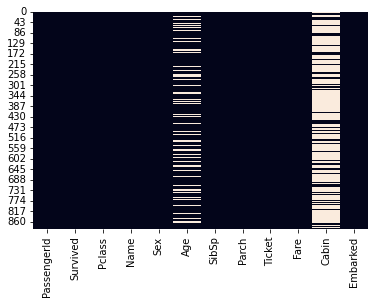

In [7]:
sns.heatmap(train.isnull(), cbar = False)

<AxesSubplot:>

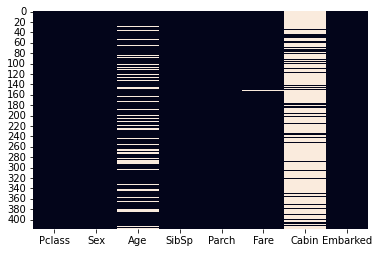

In [8]:
sns.heatmap(test.isnull(), cbar = False)

> Cabin 데이터들은 NaN값이 많으므로 Colum자체를 삭제

In [9]:
X = X.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
print(X.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non

<AxesSubplot:>

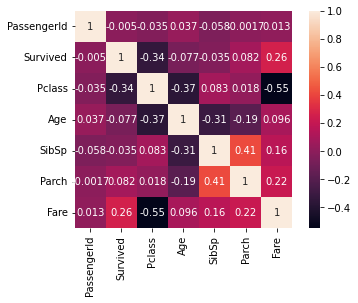

In [10]:
sns.heatmap(train.corr(), square = True, annot = True)

> X에서는 각 열의 결측치가 있는 행은 삭제

In [11]:
X = X.dropna(subset = ['Age','Embarked' ])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


> test 데이터에서는 결측치 행을 삭제하는 것이 아니라 채워준다

In [12]:
#평균값
def miss_mean():
    age_tmp = test['Age'].fillna(test['Age'].mean())

    Fare_tmp = test['Fare'].fillna(test['Fare'].mean())
    
    return age_tmp, Fare_tmp

#0
def miss_zero():
    age_tmp = test['Age'].fillna(0)

    Fare_tmp = test['Fare'].fillna(0)
    
    return age_tmp, Fare_tmp

#linear
def miss_linear():
    age_tmp = test['Age'].interpolate(method = 'linear', limit_direction = 'forward')

    Fare_tmp = test['Fare'].interpolate(method = 'linear', limit_direction = 'forward')
    
    return age_tmp, Fare_tmp

> * Column당 평균
> * 상수 0
> * 선형법

In [13]:
test['Age'], test['Fare'] = miss_linear()

# EDA

In [14]:
from sklearn.preprocessing import LabelEncoder

cols = ['Sex', 'Embarked']

for col in cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    test[col] = le.transform(test[col])
print(X.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int

In [15]:
print(np.array(X['Age']))

[22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   45.    4.
 29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83 30.
 22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.   26.
 59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.   38.
 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.   32.5
 32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.   19.
 37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5  42.
 51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.    1.
  9.   45.   28.   61.    4.    1.   21.   56.   18.   50.   30.   36.
  9.    1.    4.   45.   40.   36.   32.   19.   19.    3.   44.   58.
 42.   24.   28.   34.   45.5  18.    2.   32.   26.   16.   40.   24.
 35. 

Age 데이터의 dtype이 float인 이유는 중간에 소수점 데이터가 섞여있음.

In [16]:
X['Age'] = X['Age'].round(0).astype('int64')
test['Age'] = test['Age'].round(0).astype('int64')

> 반올림 후 astype을 이용해 int형으로 바꿔줌

In [17]:
Y = X['Survived']
X = X.drop(['Survived'], axis = 1)

# Scaling

In [18]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

for col in cols:
    X[col] = np.log1p(X[col])
    test[col] = np.log1p(test[col])

# Data Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1, stratify = Y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(498, 7)
(498,)
(214, 7)
(214,)


# Creat Modek & Model Training

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

para_grid = {'C' : [0.001, 0.01, 0.1, 1, 10 ,50],
             'solver' : ['sag', 'saga']}

Logit1 = GridSearchCV(LogisticRegression(penalty='l2' ,random_state=1), para_grid, cv = 3)

Logit1.fit(X_train, y_train)

y_test_logistic = Logit1.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2, p=1)

para_grid = {'n_neighbors' : [3,4,5,6,7,8]}

knn = GridSearchCV(KNeighborsClassifier(p=1), para_grid, cv = 3)

knn.fit(X_train,y_train)

y_test_knn = knn.predict(X_test)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cld =LinearDiscriminantAnalysis(store_covariance=True)

cld.fit(X_train, y_train)

y_test_lda = cld.predict(X_test)

In [23]:
from sklearn.svm import LinearSVC

para_grid = {'loss' : ['hinge', 'squared_hinge'],
              'multi_class' : ['ovr', 'crammer_singer'], 
             'C' : [0.001, 0.01, 0.1, 1, 10]}

svm = GridSearchCV(LinearSVC(class_weight='balanced'), para_grid, cv = 3)

svm.fit(X_train,y_train)
y_test_svm = svm.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

# Accuracy

In [24]:
from sklearn.metrics import accuracy_score

print("Logistic  :" , accuracy_score(y_test,y_test_logistic))
print("KNN  :" , accuracy_score(y_test,y_test_knn))
print("LDA  :" , accuracy_score(y_test,y_test_lda))
print("SVM  :" , accuracy_score(y_test,y_test_svm))

Logistic  : 0.8130841121495327
KNN  : 0.8130841121495327
LDA  : 0.8037383177570093
SVM  : 0.7663551401869159


In [25]:
submit['Survived'] = svm.predict(test)
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
submit.to_csv("Model_svm.csv", index = False)